In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import random
import missingno

In [35]:
data = pd.DataFrame()

#animal = ['Dog']*200 + ['Cat']*100 + ['Frog']*100
#random.shuffle(animal)
#data['Animal'] = animal

age = np.random.randint(12, 50, size=400)
data['Age'] = age

healthy = np.random.randint(0,2,size=400)
data['Healthy'] = healthy

something_empty = [np.NAN]*400
data['Null Vals'] = something_empty

binary_something = np.random.randint(0,2,size=400)
data['SO'] = binary_something

data.head()

,Age,Healthy,Null Vals,SO
0,40,1,NaN,1
1,14,0,NaN,0
2,15,0,NaN,0
3,25,0,NaN,0
4,30,0,NaN,1


In [15]:
data

,Age,Healthy,Null Vals,SO
0,35,1,NaN,0
1,42,1,NaN,0
2,21,0,NaN,0
3,14,0,NaN,1
4,41,1,NaN,1
...,...,...,...,...
395,14,1,NaN,1
396,43,1,NaN,0
397,43,0,NaN,0
398,14,1,NaN,0


In [3]:
def create_null_values(data_set, prob=0.1):
    new_data = data_set.copy(deep=True)
    for column in data.columns:
        for entry in range(0,len(data[column])):
            random_indicator = np.random.randint(0, 10)
            if random_indicator < prob*10:
                new_data.loc[entry,column] = np.nan
    return new_data

Text(0, 0.5, 'Hey')

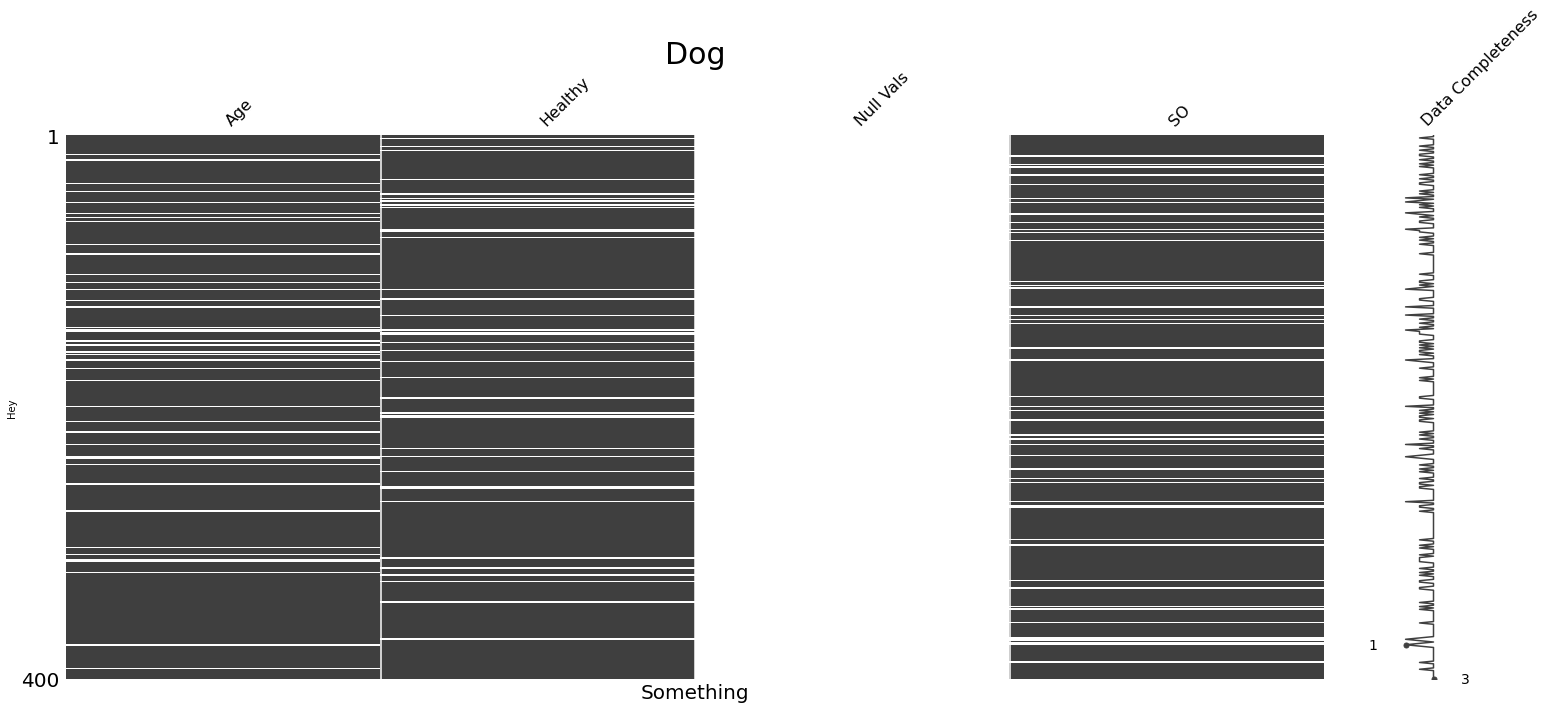

In [36]:
null_data = create_null_values(data)
import matplotlib.pyplot as plt
missingno.matrix(null_data, labels=True)
plt.title("Dog", fontsize=30)
plt.xlabel("Something", fontsize=20)
plt.ylabel("Hey")

Text(0, 0.5, 'Null Column Similarity')

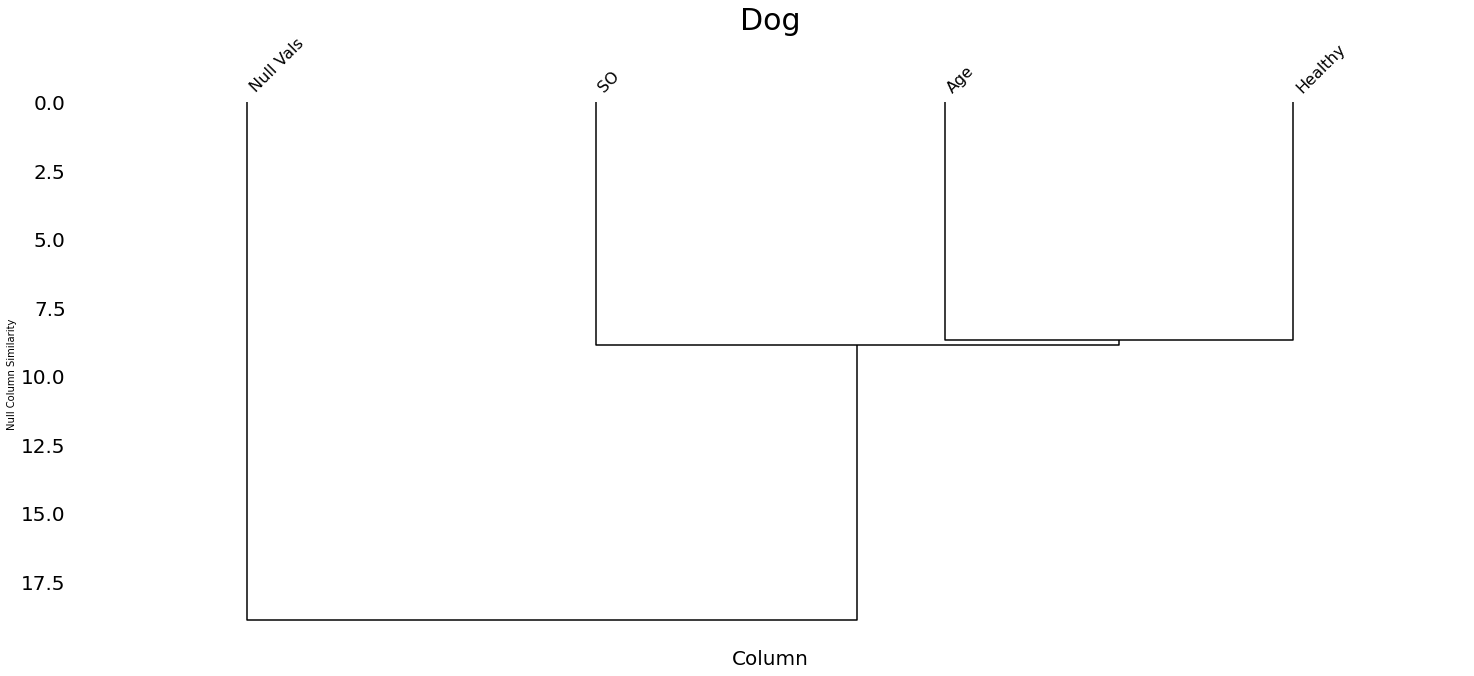

In [41]:
missingno.dendrogram(null_data)
plt.title("Dog", fontsize=30)
plt.xlabel("Column", fontsize=20)
plt.ylabel("Null Column Similarity")

In [22]:
null_data.isna().sum().values

array([ 38,  35, 400,  38], dtype=int64)

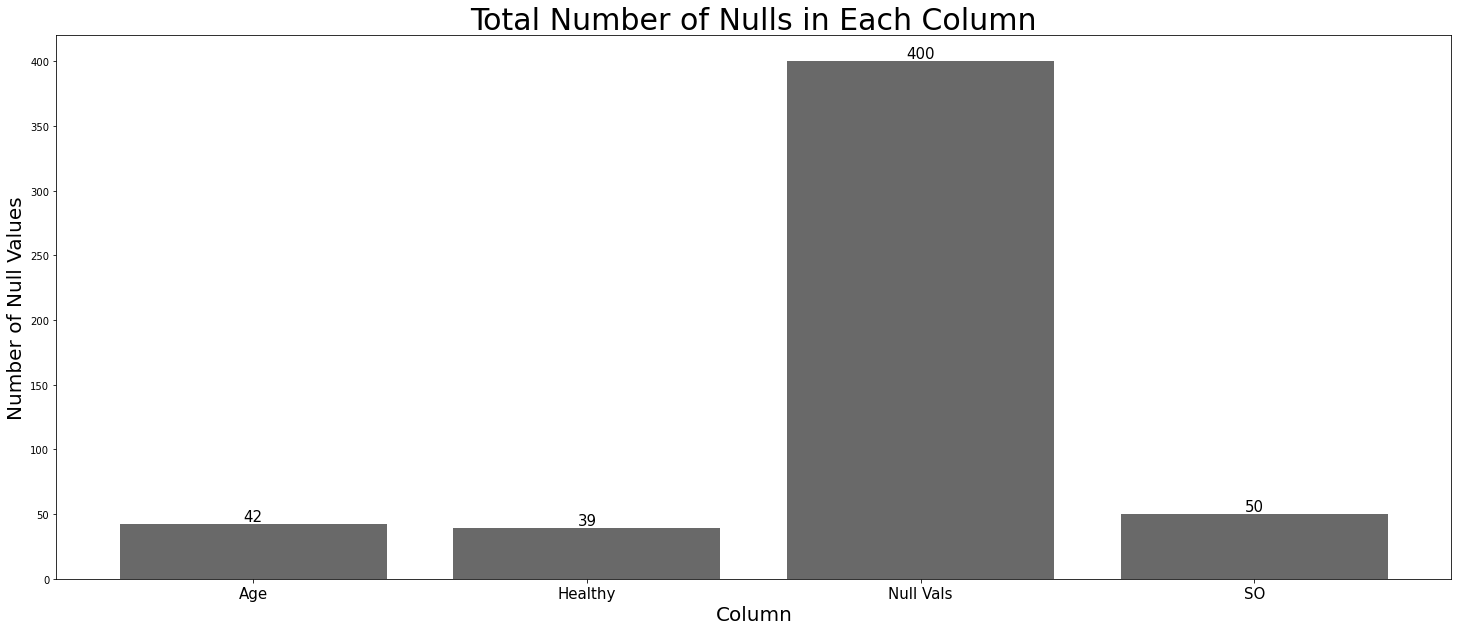

In [55]:
#bar = missingno.bar(null_data, labels=True)

import numpy as np

null_values = null_data.isna().sum().values


if len(null_data.columns) <= 50:
    plt.figure(figsize=(25, 10))
    plt.bar(null_data.columns, null_values, color='dimgray')
else:
    plt.figure(figsize=(25, (25 + len(null_data.columns) - 50) * 0.5))
    plt.barh(null_data.columns, null_values, color='dimgray')
    
xlocs, ylocs = plt.xticks(fontsize=15, rotation=45)
for i, v in enumerate(null_values):
    plt.text(xlocs[i], v, str(v), fontsize=15, verticalalignment='bottom', horizontalalignment='center')
plt.title("Total Number of Nulls in Each Column", fontsize=30)
plt.xlabel("Column", fontsize=20)
plt.ylabel("Number of Null Values", fontsize=20)
plt.show()

In [40]:
def remove_monotone_columns(data):
    # Keeps track of the columns that contain more than 1 unique value
    columns_to_keep = []
    for col in data.columns:
        unique_values = data[col].unique()

        # If the column only contains one value, add it for removal
        if len(unique_values) != 1:
            columns_to_keep.append(col)

    return data[columns_to_keep]

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
mice_imputer = IterativeImputer(random_state=0, sample_posterior=True)

fixed_data = mice_imputer.fit(remove_monotone_columns(data)).transform(remove_monotone_columns(data))

In [48]:
print(mice_imputer)

None


In [49]:
imputed_dataset = pd.DataFrame(fixed_data, columns=remove_monotone_columns(data).columns)
imputed_dataset.head()

,Age,Healthy,SO
0,35.0,1.0,0.0
1,42.0,1.0,0.0
2,21.0,0.0,0.0
3,14.0,0.0,1.0
4,41.0,1.0,1.0


In [26]:
from missingpy import MissForest

C:\Users\volle\anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
miss_forest_imputer = MissForest()

fixed_data = miss_forest_imputer.fit(null_data[['SO', 'Age', 'Healthy']]).transform(null_data[['SO', 'Age', 'Healthy']])

Iteration: 0
Iteration: 1
Iteration: 2


In [30]:
print(fixed_data)

[[ 0.11698377 24.          1.        ]
 [ 0.         31.          0.        ]
 [ 1.         16.          1.        ]
 ...
 [ 0.         44.          1.        ]
 [ 0.         23.          0.        ]
 [ 0.         20.          1.        ]]
